# Film Flix Database Statistics

In [15]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

Import required packages
Retrieve data from the API in json file

In [2]:
response = requests.get("https://filmflixrestapi.onrender.com/api/films")
data = response.json()

Read the retrieved json into a pandas dataframe
Print the first 5 lines of the data frame
Print the last 5 lines of the data frame

In [3]:
url = "https://filmflixrestapi.onrender.com/api/films"
df = pd.read_json(url) 
print(df.head())
print(df.tail())

   duration      genre  id rating                    title  year_released
0       116     Comedy   1     PG              The Muppets           2022
1       109       Test   2     PG     The Legend of Tarzan           2016
2       123     Action   3     PG             Jason Bourne           2016
3       116      Crime   4      R            The Nice Guys           2016
4        91  Animation   5      G  The Secret Life of Pets           2016
    duration      genre  id rating                title  year_released
31       108  Animation  32     PG           Big Hero 6           2014
32       106      Crime  33      R             The Drop           2014
33       131   Fighting  34     PG        Kunfu Vs Lama           1979
34       123     Action  35     PG           The Matrix           2021
35       185    Fantasy  36     PG  Matrix Resurections           2021


### Films by Year

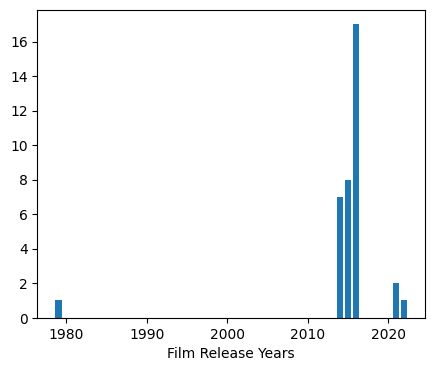

In [4]:
year = df['year_released']

values, counts = np.unique(year, return_counts=True)

ax1 = plt.figure(figsize=(5,4))
ax1 = plt.bar(values, counts)
ax1 = plt.xlabel("Film Release Years")

plt.show()

Most of the films are modern, created between 2010 and 2020.

### Films split by Genre

Text(0.5, 1.0, "Genre's in Film Flix Database")

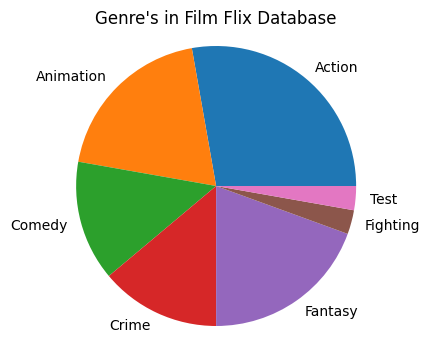

In [5]:
genre = df['genre']
values, counts = np.unique(genre, return_counts=True)

plt.figure(figsize=(5,4))
plt.pie(counts, labels=values)
plt.axis('equal')
plt.title("Genre's in Film Flix Database")

There are very few SciFi movies available.

### How long are the movies?

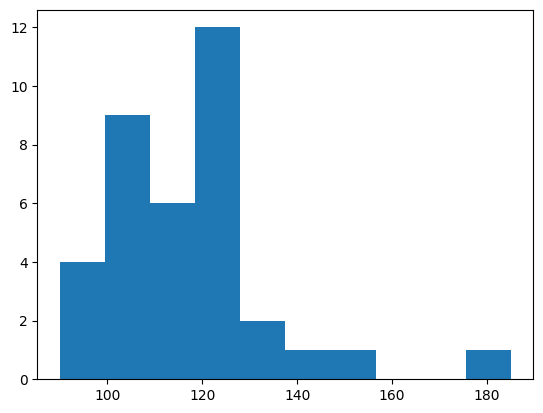

In [6]:
duration = df['duration']
plt.hist(duration, bins=10)
plt.show()

Most movies are around 2hrs long.

#### Are movies in 2023 longer than those created in previous years?

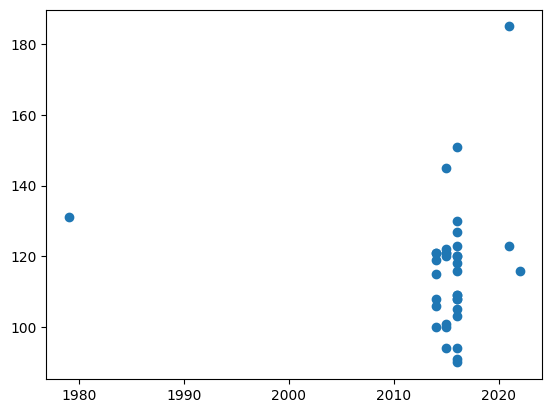

In [7]:
plt.scatter(year, duration)
plt.show()

The database does contain a couple of epics; Space Odessy and Babylon!

### Films by Rating

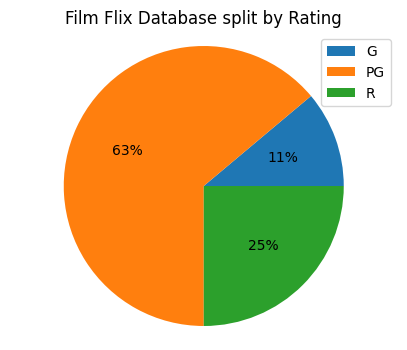

In [8]:
rating = df['rating']
values, counts = np.unique(rating, return_counts=True)

plt.figure(figsize=(5,4))
plt.pie(counts, autopct='%d%%')
plt.axis('equal')
plt.title("Film Flix Database split by Rating")
plt.legend(values, loc='upper right')

This movie database is primarily designed for family viewing.

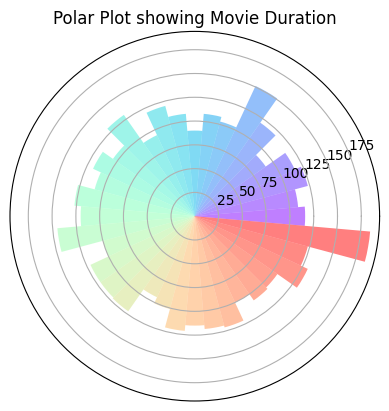

In [29]:
N = len(df)
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

radii = df['duration'] # bar height based on movie duration
width = (2 * np.pi) / N # ensure no overlap

norm = Normalize(0, N-1)
colors = plt.cm.rainbow(norm(range(N)))
#colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)
ax.grid(True)
ax.set_xticks([])
ax.set_title("Polar Plot showing Movie Duration")

plt.show()

Polar Plot showing movie length in minutes.


https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html